In [4]:
# installare (se necessario) e importare GeoPandas

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [29]:
piste_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/bike_ciclabili.zip')
piste_ciclabili

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (9.23902 45.44251, 9.23898 45.44256)"
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (9.23990 45.43999, 9.23985 45.44009..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (9.14977 45.46021, 9.14979 45.46024)"
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (9.14966 45.46050, 9.14972 45.46057)"
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (9.14963 45.46046, 9.14966 45.46050)"
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (9.14957 45.46039, 9.14963 45.46046)"


In [9]:
# visualizzaere il geodataset delel piste ciclabili

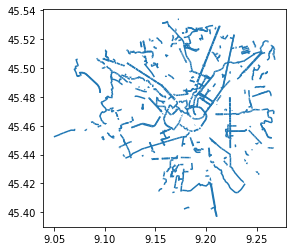

In [10]:
piste_ciclabili.plot()

In [11]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [12]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/ds964_nil_wm.zip')
quartieri_milano

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [13]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

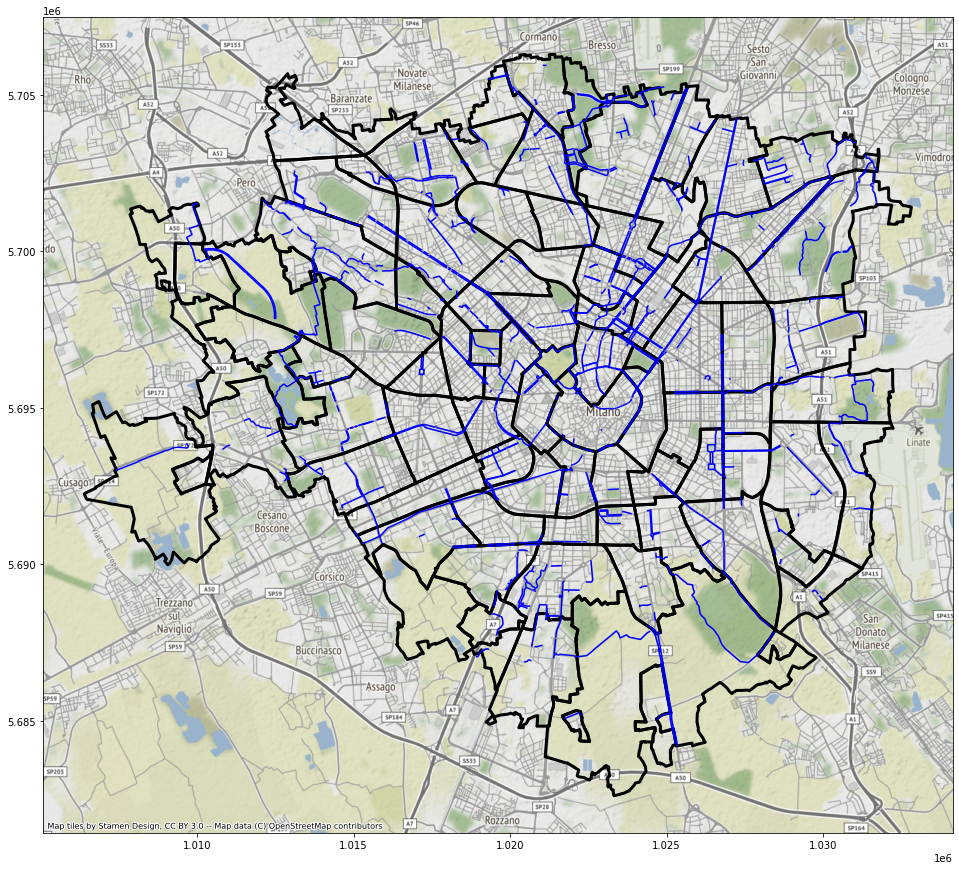

In [14]:
ax = quartieri_milano.to_crs(epsg=3857).plot(facecolor='none', edgecolor='k', figsize= (20,15), linewidth=3)
piste_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/bike_ciclabili.zip').to_crs(epsg=3857).plot(facecolor='none', edgecolor='b', ax = ax)

ctx.add_basemap(ax)

In [17]:
# trovare il quartiere meno esteso
quartieri_min = quartieri_milano[quartieri_milano['Shape_Area']==min(quartieri_milano['Shape_Area'])]
quartieri_min

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,188863.446965,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."


In [18]:
# trovare il quartiere più esteso
quartieri_max = quartieri_milano[quartieri_milano['Shape_Area']==max(quartieri_milano['Shape_Area'])]
quartieri_max

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((9.21711 45.43187, 9.21733 45.43160, ..."


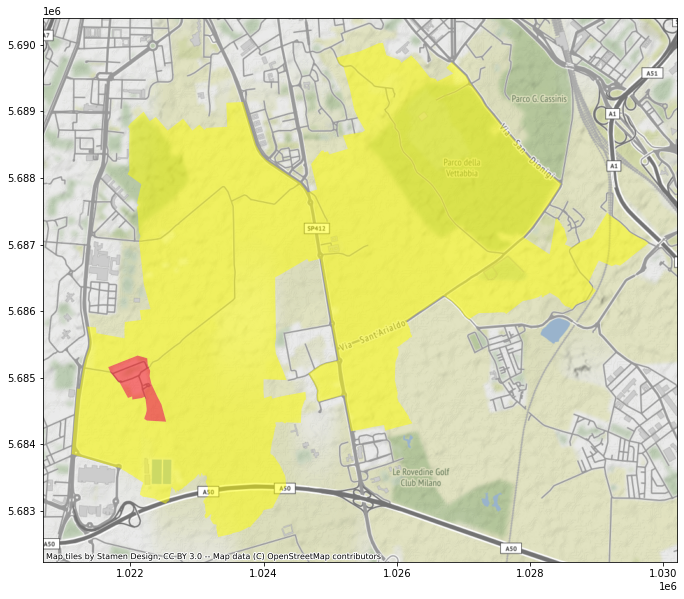

In [20]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax= quartieri_milano[quartieri_milano['Shape_Area']==max(quartieri_milano['Shape_Area'])].to_crs(epsg=3857).plot(facecolor='yellow', alpha=0.5, figsize=(15,10))
quartieri_milano[quartieri_milano['Shape_Area']==min(quartieri_milano['Shape_Area'])].to_crs(epsg=3857).plot(ax=ax, facecolor='red', alpha=0.5)
ctx.add_basemap(ax)

In [22]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [25]:
affori = quartieri_milano.loc[quartieri_milano['NIL'].str.contains('AFFORI')]
affori

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [28]:
piste_ciclabili[piste_ciclabili.intersects(affori.geometry.squeeze())]

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (9.17915 45.51407, 9.17960 45.51413)"
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (9.18299 45.50597, 9.18272 45.50617..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (9.18176 45.50722, 9.18153 45.50742..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (9.18045 45.50883, 9.18043 45.50890..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (9.17925 45.51284, 9.17884 45.51277)"
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (9.17701 45.50897, 9.17706 45.50891)"
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (9.17675 45.50935, 9.17701 45.50897)"
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (9.17664 45.50951, 9.17675 45.50935)"
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (9.17641 45.50983, 9.17664 45.50951)"


In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

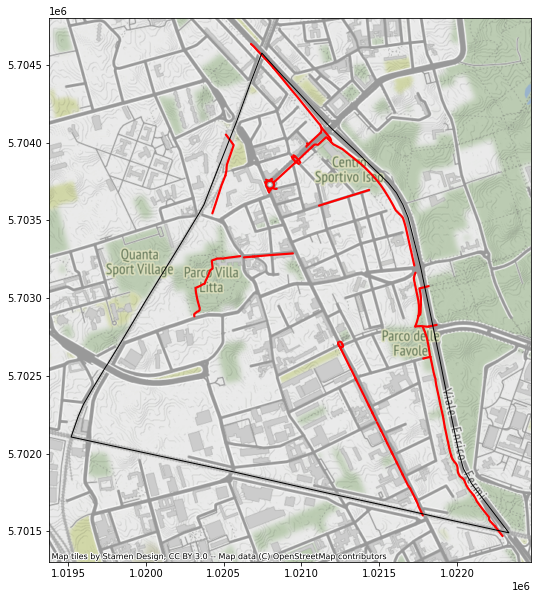

In [30]:
ax = piste_ciclabili[piste_ciclabili.intersects(affori.geometry.squeeze())].to_crs(epsg=3857).buffer(7).plot(facecolor='r',figsize=(15,10))
affori.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)